# WELCOME TO PET FINDERS ANALYSIS

**Objective**: WHO'S THE BETTER BOY? Between cats and dogs, which of these animals are more likely to get adopted?

**Motivation**: There undeniably an absurd amount of stray animals on the street, so what enchances their appeal for adoption? This project investigates the compenents that make up these adorable fur-balls, and which of these features would get them their forever home.

**GROUP**
- Anis Hazirah binit Mohamad Sabry (1211300373) - Data Preparation, Exploratory Data Analysis, PCA Implementation
- Nuha
- Lutfi
- Ong Shi Yi

// add ur own names this should be alphabetical maybe

# Let's get started!

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading data
https://www.kaggle.com/competitions/petfinder-adoption-prediction

In [5]:
raw = pd.read_csv("Dataset\\train.csv")
raw.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,...,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


In [6]:
breedlabels = pd.read_csv('Dataset\PetFinder-BreedLabels.csv')
colourlabels = pd.read_csv('Dataset\PetFinder-ColorLabels.csv')
statelabels = pd.read_csv('Dataset\PetFinder-StateLabels.csv')

display(breedlabels.head())
display(colourlabels.head())
display(statelabels.head())

,BreedID,Type,BreedName
0,1,1,Affenpinscher
1,2,1,Afghan Hound
2,3,1,Airedale Terrier
3,4,1,Akbash
4,5,1,Akita


,ColorID,ColorName
0,1,Black
1,2,Brown
2,3,Golden
3,4,Yellow
4,5,Cream


,StateID,StateName
0,41336,Johor
1,41325,Kedah
2,41367,Kelantan
3,41401,Kuala Lumpur
4,41415,Labuan


# Cleaning time!

In [7]:
display(raw.shape)
display(raw.columns)
display(raw.dtypes)

(14993, 24)

Index(['Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'RescuerID',
       'VideoAmt', 'Description', 'PetID', 'PhotoAmt', 'AdoptionSpeed'],
      dtype='object')

Type               int64
Name              object
Age                int64
Breed1             int64
Breed2             int64
Gender             int64
Color1             int64
Color2             int64
Color3             int64
MaturitySize       int64
FurLength          int64
Vaccinated         int64
Dewormed           int64
Sterilized         int64
Health             int64
Quantity           int64
Fee                int64
State              int64
RescuerID         object
VideoAmt           int64
Description       object
PetID             object
PhotoAmt         float64
AdoptionSpeed      int64
dtype: object

In [8]:
for col in raw.columns:
    print(col, 'null count:', raw[col].isna().sum())

Type null count: 0
Name null count: 1265
Age null count: 0
Breed1 null count: 0
Breed2 null count: 0
Gender null count: 0
Color1 null count: 0
Color2 null count: 0
Color3 null count: 0
MaturitySize null count: 0
FurLength null count: 0
Vaccinated null count: 0
Dewormed null count: 0
Sterilized null count: 0
Health null count: 0
Quantity null count: 0
Fee null count: 0
State null count: 0
RescuerID null count: 0
VideoAmt null count: 0
Description null count: 13
PetID null count: 0
PhotoAmt null count: 0
AdoptionSpeed null count: 0


## Mapping

In [9]:
# PetID - Unique hash ID of pet profile
# AdoptionSpeed - Categorical speed of adoption. Lower is faster. This is the value to predict. See below section for more info.
# Type - Type of animal (1 = Dog, 2 = Cat)
# Name - Name of pet (Empty if not named)
# Age - Age of pet when listed, in months
# Breed1 - Primary breed of pet (Refer to BreedLabels dictionary)
# Breed2 - Secondary breed of pet, if pet is of mixed breed (Refer to BreedLabels dictionary)
# Gender - Gender of pet (1 = Male, 2 = Female, 3 = Mixed, if profile represents group of pets)
# Color1 - Color 1 of pet (Refer to ColorLabels dictionary)
# Color2 - Color 2 of pet (Refer to ColorLabels dictionary)
# Color3 - Color 3 of pet (Refer to ColorLabels dictionary)
# MaturitySize - Size at maturity (1 = Small, 2 = Medium, 3 = Large, 4 = Extra Large, 0 = Not Specified)
# FurLength - Fur length (1 = Short, 2 = Medium, 3 = Long, 0 = Not Specified)
# Vaccinated - Pet has been vaccinated (1 = Yes, 2 = No, 3 = Not Sure)
# Dewormed - Pet has been dewormed (1 = Yes, 2 = No, 3 = Not Sure)
# Sterilized - Pet has been spayed / neutered (1 = Yes, 2 = No, 3 = Not Sure)
# Health - Health Condition (1 = Healthy, 2 = Minor Injury, 3 = Serious Injury, 0 = Not Specified)
# Quantity - Number of pets represented in profile
# Fee - Adoption fee (0 = Free)
# State - State location in Malaysia (Refer to StateLabels dictionary)
# RescuerID - Unique hash ID of rescuer
# VideoAmt - Total uploaded videos for this pet
# PhotoAmt - Total uploaded photos for this pet
# Description - Profile write-up for this pet. The primary language used is English, with some in Malay or Chinese.

In [10]:
# cat or dog?
type_map = {1: 'Dog',
            2: 'Cat'}

gender_map = {1: 'Male',
              2: 'Female',
              3: 'Mixed'}

# MaturitySize
maturity_map = {1: 'Small',
                2: 'Medium',
                3: 'Large',
                4: 'Extra Large',
                0: 'Not Specified'}

#FurLength
fur_map = {1: 'Short',
           2: 'Medium',
           3: 'Long',
           0: 'Not Specified'}

#Vaccinated, Dewormed, Sterilized
vax_map = {1: 'Yes',
           2: 'No',
           3: 'Not Sure'}

# Health
health_map = {1: 'Healthy',
              2: 'Minor Injury',
              3: 'Serious Injury',
              0: 'Not Specified'}

#AdoptionSpeed
adopt_map = {0: 'Same day',
             1: '1st week (1-7 days)',
             2: '1st month (8-30 days)',
             3: '2nd and 3rd month (31-90 days)',
             4: 'No adoption after 100 days'}

In [11]:
# breed label mapping

breed_map = {}

for index, row in breedlabels.iterrows():
    breed_map[row['BreedID']] = row['BreedName']

In [12]:
# colour mapping

colour_map = {}

for index, row in colourlabels.iterrows():
    colour_map[row['ColorID']] = row['ColorName']

colour_map

{1: 'Black',
 2: 'Brown',
 3: 'Golden',
 4: 'Yellow',
 5: 'Cream',
 6: 'Gray',
 7: 'White'}

In [13]:
# state mapping

state_map = {}

for index, row in statelabels.iterrows():
    state_map[row['StateID']] = row['StateName']

state_map

{41336: 'Johor',
 41325: 'Kedah',
 41367: 'Kelantan',
 41401: 'Kuala Lumpur',
 41415: 'Labuan',
 41324: 'Melaka',
 41332: 'Negeri Sembilan',
 41335: 'Pahang',
 41330: 'Perak',
 41380: 'Perlis',
 41327: 'Pulau Pinang',
 41345: 'Sabah',
 41342: 'Sarawak',
 41326: 'Selangor',
 41361: 'Terengganu'}

In [14]:
raw_mapped = raw.copy()

# mapping everything
raw_mapped['Type'] = raw_mapped['Type'].map(type_map)
raw_mapped['Gender'] = raw_mapped['Gender'].map(gender_map)
raw_mapped['MaturitySize'] = raw_mapped['MaturitySize'].map(maturity_map)
raw_mapped['FurLength'] = raw_mapped['FurLength'].map(fur_map)
raw_mapped['Health'] = raw_mapped['Health'].map(health_map)
raw_mapped['AdoptionSpeed'] = raw_mapped['AdoptionSpeed'].map(adopt_map)
raw_mapped['State'] = raw_mapped['State'].map(state_map)

breed_cols = ['Breed1', 'Breed2']
for col in breed_cols:
    raw_mapped[col] = raw_mapped[col].map(breed_map)

colour_cols = ['Color1', 'Color2', 'Color3']
for col in colour_cols:
    raw_mapped[col] = raw_mapped[col].map(colour_map)

vax_cols = ['Vaccinated', 'Dewormed', 'Sterilized']
for col in vax_cols:
    raw_mapped[col] = raw_mapped[col].map(vax_map)

raw_mapped.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,Cat,Nibble,3,Tabby,NaN,Male,Black,White,NaN,Small,...,Healthy,1,100,Selangor,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,1st month (8-30 days)
1,Cat,No Name Yet,1,Domestic Medium Hair,NaN,Male,Black,Brown,NaN,Medium,...,Healthy,1,0,Kuala Lumpur,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,Same day
2,Dog,Brisco,1,Mixed Breed,NaN,Male,Brown,White,NaN,Medium,...,Healthy,1,0,Selangor,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,2nd and 3rd month (31-90 days)
3,Dog,Miko,4,Mixed Breed,NaN,Female,Black,Brown,NaN,Medium,...,Healthy,1,150,Kuala Lumpur,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,1st month (8-30 days)
4,Dog,Hunter,1,Mixed Breed,NaN,Male,Black,NaN,NaN,Medium,...,Healthy,1,0,Selangor,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,1st month (8-30 days)


## Null check

In [15]:
for col in raw_mapped.columns:
    print(col, 'null count:', raw_mapped[col].isna().sum())

Type null count: 0
Name null count: 1265
Age null count: 0
Breed1 null count: 5
Breed2 null count: 10762
Gender null count: 0
Color1 null count: 0
Color2 null count: 4471
Color3 null count: 10604
MaturitySize null count: 0
FurLength null count: 0
Vaccinated null count: 0
Dewormed null count: 0
Sterilized null count: 0
Health null count: 0
Quantity null count: 0
Fee null count: 0
State null count: 0
RescuerID null count: 0
VideoAmt null count: 0
Description null count: 13
PetID null count: 0
PhotoAmt null count: 0
AdoptionSpeed null count: 0


In [16]:
null_breed = raw_mapped[raw_mapped['Breed1'].isnull()]
display(null_breed)

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
391,Dog,Lil Milo,2,NaN,Belgian Shepherd Malinois,Female,Brown,NaN,NaN,Medium,...,Healthy,1,0,Selangor,1a2113010d6048d5410b265347b35c91,0,Milo went missing after a week with her new ad...,375905770,3.0,2nd and 3rd month (31-90 days)
1045,Dog,Bella 4 Months Puppy!,4,NaN,Mixed Breed,Female,Brown,Golden,NaN,Medium,...,Healthy,1,100,Selangor,3673e167fc9932b13149bed1f2a0180a,0,"She's only 4 months old, very friendly and lov...",da8d4a273,5.0,No adoption after 100 days
3219,Cat,NaN,3,NaN,Domestic Short Hair,Mixed,Black,Yellow,White,Small,...,Healthy,3,0,Kuala Lumpur,f7cff59d10c867bdee12c3f35f34d086,0,Mama cat came to house and gave birth to these...,27e74e45c,11.0,1st month (8-30 days)
7285,Dog,"""Boy Boy""",72,NaN,Mixed Breed,Male,Black,Brown,NaN,Medium,...,Healthy,1,0,Selangor,94b991f8dc1e0bb903ca8d4d492c8d43,0,He is a stray dog found wandering around Unive...,7b5bee232,5.0,No adoption after 100 days
7706,Dog,Looking Newborn Puppy For Adoption,2,NaN,Shih Tzu,Female,Brown,Cream,White,Small,...,Healthy,1,1,Johor,5232bdd1444960a257ccec9a41404320,0,I want to adopt a newborn puppy Prefer small b...,0327b8e94,0.0,2nd and 3rd month (31-90 days)


In [17]:
for index, is_null in raw_mapped['Breed1'].isnull().items():
    if is_null:
        raw_mapped.loc[index, 'Breed1'] = raw_mapped.loc[index, 'Breed2']
        raw_mapped.loc[index, 'Breed2'] = np.nan
        display(raw_mapped.loc[index])

Type                                                           Dog
Name                                                      Lil Milo
Age                                                              2
Breed1                                   Belgian Shepherd Malinois
Breed2                                                         NaN
Gender                                                      Female
Color1                                                       Brown
Color2                                                         NaN
Color3                                                         NaN
MaturitySize                                                Medium
FurLength                                                    Short
Vaccinated                                                     Yes
Dewormed                                                       Yes
Sterilized                                                      No
Health                                                     Hea

Type                                                           Dog
Name                                         Bella 4 Months Puppy!
Age                                                              4
Breed1                                                 Mixed Breed
Breed2                                                         NaN
Gender                                                      Female
Color1                                                       Brown
Color2                                                      Golden
Color3                                                         NaN
MaturitySize                                                Medium
FurLength                                                    Short
Vaccinated                                                     Yes
Dewormed                                                       Yes
Sterilized                                                      No
Health                                                     Hea

Type                                                           Cat
Name                                                           NaN
Age                                                              3
Breed1                                         Domestic Short Hair
Breed2                                                         NaN
Gender                                                       Mixed
Color1                                                       Black
Color2                                                      Yellow
Color3                                                       White
MaturitySize                                                 Small
FurLength                                                    Short
Vaccinated                                                      No
Dewormed                                                       Yes
Sterilized                                                      No
Health                                                     Hea

Type                                                           Dog
Name                                                     "Boy Boy"
Age                                                             72
Breed1                                                 Mixed Breed
Breed2                                                         NaN
Gender                                                        Male
Color1                                                       Black
Color2                                                       Brown
Color3                                                         NaN
MaturitySize                                                Medium
FurLength                                                   Medium
Vaccinated                                                      No
Dewormed                                                        No
Sterilized                                                      No
Health                                                     Hea

Type                                                           Dog
Name                            Looking Newborn Puppy For Adoption
Age                                                              2
Breed1                                                    Shih Tzu
Breed2                                                         NaN
Gender                                                      Female
Color1                                                       Brown
Color2                                                       Cream
Color3                                                       White
MaturitySize                                                 Small
FurLength                                                    Short
Vaccinated                                                      No
Dewormed                                                        No
Sterilized                                                      No
Health                                                     Hea

## Check dtypes

In [18]:
raw_dtypes = raw_mapped.copy()

display(raw_dtypes.head())
display(raw_dtypes.dtypes)

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,Cat,Nibble,3,Tabby,NaN,Male,Black,White,NaN,Small,...,Healthy,1,100,Selangor,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,1st month (8-30 days)
1,Cat,No Name Yet,1,Domestic Medium Hair,NaN,Male,Black,Brown,NaN,Medium,...,Healthy,1,0,Kuala Lumpur,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,Same day
2,Dog,Brisco,1,Mixed Breed,NaN,Male,Brown,White,NaN,Medium,...,Healthy,1,0,Selangor,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,2nd and 3rd month (31-90 days)
3,Dog,Miko,4,Mixed Breed,NaN,Female,Black,Brown,NaN,Medium,...,Healthy,1,150,Kuala Lumpur,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,1st month (8-30 days)
4,Dog,Hunter,1,Mixed Breed,NaN,Male,Black,NaN,NaN,Medium,...,Healthy,1,0,Selangor,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,1st month (8-30 days)


Type              object
Name              object
Age                int64
Breed1            object
Breed2            object
Gender            object
Color1            object
Color2            object
Color3            object
MaturitySize      object
FurLength         object
Vaccinated        object
Dewormed          object
Sterilized        object
Health            object
Quantity           int64
Fee                int64
State             object
RescuerID         object
VideoAmt           int64
Description       object
PetID             object
PhotoAmt         float64
AdoptionSpeed     object
dtype: object

In [19]:
for col in raw_dtypes.columns:
    print(col, raw_dtypes[col].unique())
    print()

Type ['Cat' 'Dog']

Name ['Nibble' 'No Name Yet' 'Brisco' ... 'Monkies' 'Ms Daym' 'Fili']

Age [  3   1   4  12   0   2  78   6   8  10  36  14  24   5  72  60   9  48
  62  47  19 120  32   7  17  22  16  13  11  37  18  55  20  28  74  53
  25  84  76  30 132  96  46  15  50  56  54  23  92  29  27  49  44 144
  21  31  41  51  65  34 135  39  52  42 108  81  26  38  69 212  33  75
  95  80  63  61 255  89  91  35 117  73 122 123  64  87 112 156  66  67
  77 180  82  86  40  57 168 102  45 147  68  85  88  43 238 100]

Breed1 ['Tabby' 'Domestic Medium Hair' 'Mixed Breed' 'Domestic Short Hair'
 'Domestic Long Hair' 'Terrier' 'Greyhound' 'Persian' 'Rottweiler'
 'Shih Tzu' 'Siamese' 'Jack Russell Terrier' 'American Shorthair' 'Spitz'
 'Labrador Retriever' 'Pit Bull Terrier' 'Silky Terrier' 'Bombay' 'Husky'
 'Schnauzer' 'Golden Retriever' 'Siberian Husky' 'Collie'
 'German Shepherd Dog' 'Tortoiseshell' 'Doberman Pinscher' 'Calico'
 'American Staffordshire Terrier' 'Beagle' 'Turkish Van'


In [20]:
raw_dtypes['PhotoAmt'] = raw_dtypes['PhotoAmt'].astype('int64')

raw_dtypes['PhotoAmt'].unique()

array([ 1,  2,  7,  8,  3,  9,  6,  5,  0, 19, 11,  4, 13, 15, 21, 18, 12,
       10, 24, 14, 16, 23, 28, 20, 26, 27, 22, 30, 29, 17, 25],
      dtype=int64)

In [21]:
raw_dtypes.to_csv('data.csv')

In [22]:
drop = ['RescuerID', 'PetID', 'Name', 'Description']
df = raw_dtypes.drop(columns=drop)

df.dtypes

Type             object
Age               int64
Breed1           object
Breed2           object
Gender           object
Color1           object
Color2           object
Color3           object
MaturitySize     object
FurLength        object
Vaccinated       object
Dewormed         object
Sterilized       object
Health           object
Quantity          int64
Fee               int64
State            object
VideoAmt          int64
PhotoAmt          int64
AdoptionSpeed    object
dtype: object

In [23]:
for col in df.columns:
    print(col, df[col].unique())
    print()

Type ['Cat' 'Dog']

Age [  3   1   4  12   0   2  78   6   8  10  36  14  24   5  72  60   9  48
  62  47  19 120  32   7  17  22  16  13  11  37  18  55  20  28  74  53
  25  84  76  30 132  96  46  15  50  56  54  23  92  29  27  49  44 144
  21  31  41  51  65  34 135  39  52  42 108  81  26  38  69 212  33  75
  95  80  63  61 255  89  91  35 117  73 122 123  64  87 112 156  66  67
  77 180  82  86  40  57 168 102  45 147  68  85  88  43 238 100]

Breed1 ['Tabby' 'Domestic Medium Hair' 'Mixed Breed' 'Domestic Short Hair'
 'Domestic Long Hair' 'Terrier' 'Greyhound' 'Persian' 'Rottweiler'
 'Shih Tzu' 'Siamese' 'Jack Russell Terrier' 'American Shorthair' 'Spitz'
 'Labrador Retriever' 'Pit Bull Terrier' 'Silky Terrier' 'Bombay' 'Husky'
 'Schnauzer' 'Golden Retriever' 'Siberian Husky' 'Collie'
 'German Shepherd Dog' 'Tortoiseshell' 'Doberman Pinscher' 'Calico'
 'American Staffordshire Terrier' 'Beagle' 'Turkish Van'
 'Oriental Short Hair' 'Tuxedo' 'Ragdoll' 'Cocker Spaniel' 'Poodle'
 'B

# Exploratory Data Analysis

In [24]:
import seaborn as sns

In [25]:
sns.set_palette("dark")
sns.set_style('darkgrid')

In [26]:
cats = df[df['Type'] == 'Cat']
dogs = df[df['Type'] == 'Dog']
pets = [cats, dogs]
pets_title =  ['Cats', 'Dogs']

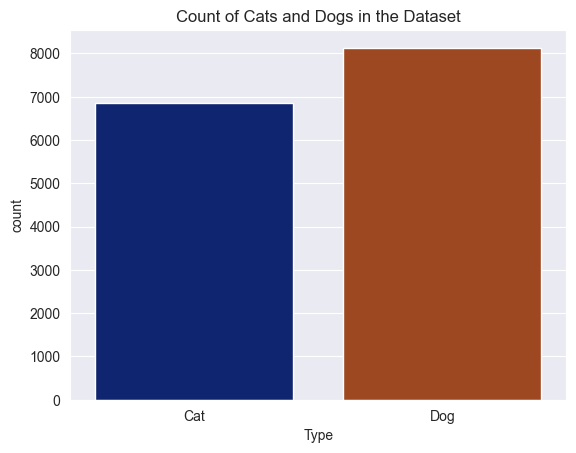

In [27]:
sns.countplot(df, x = 'Type')
plt.title('Count of Cats and Dogs in the Dataset')
plt.show()

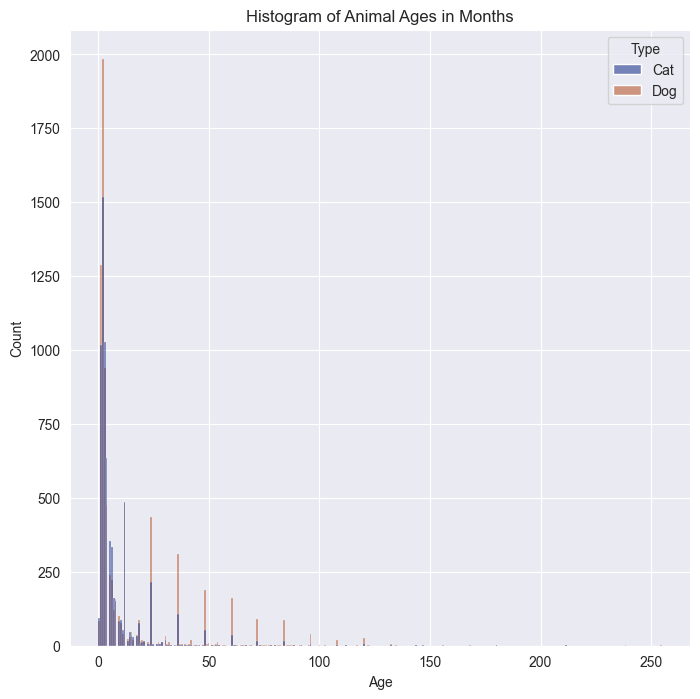

In [28]:
plt.figure(figsize=(8,8))
sns.histplot(data=df, x='Age', hue='Type')
plt.title('Histogram of Animal Ages in Months')
plt.show()

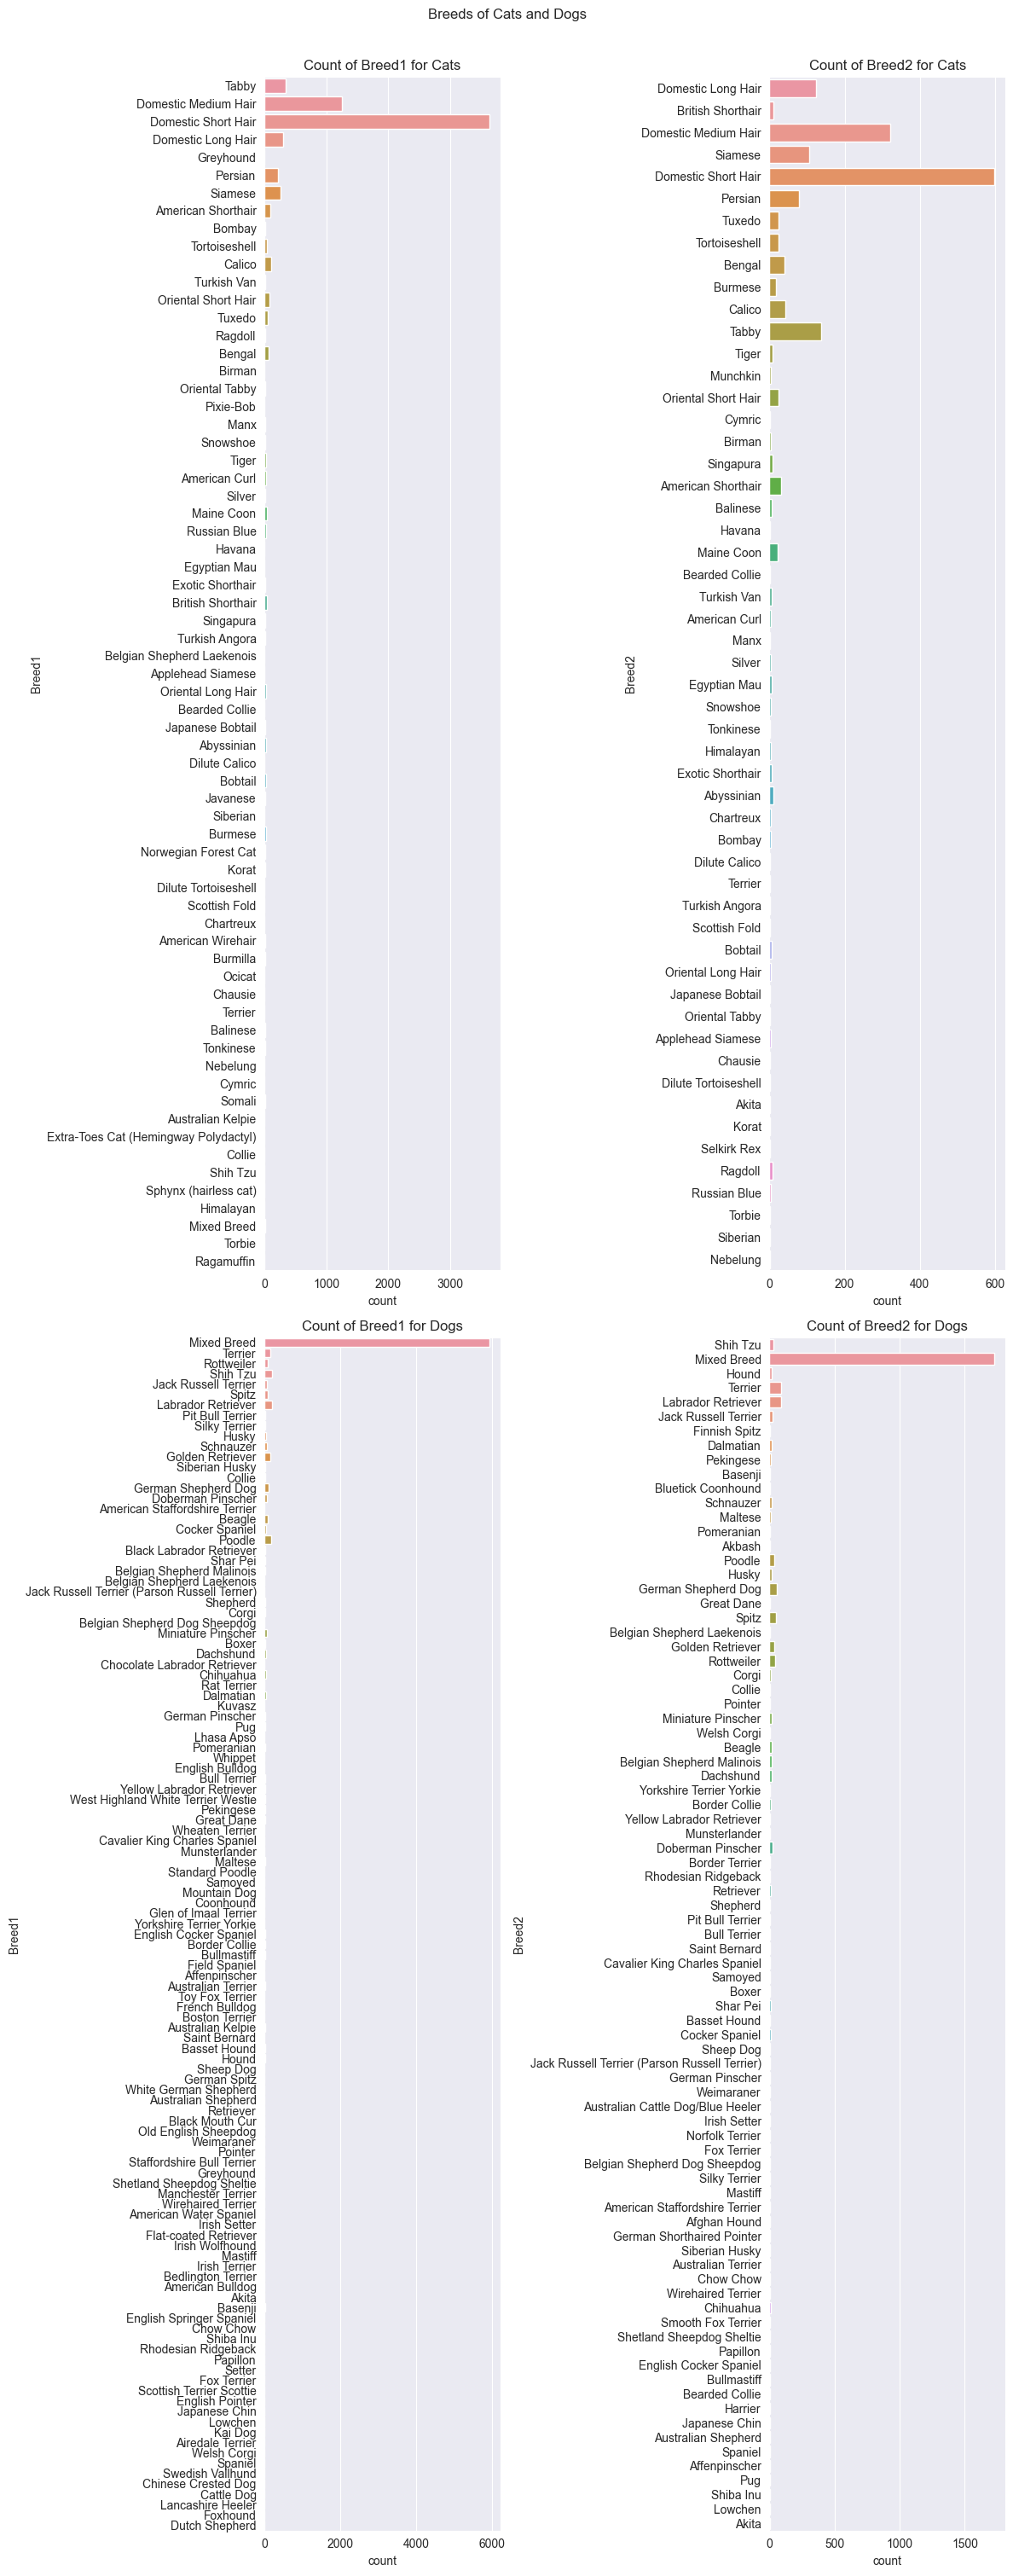

In [29]:
breed_cols = ['Breed1', 'Breed2']

fig, ax = plt.subplots(nrows=2, ncols=len(breed_cols), figsize=(12,30))

for i, (current, title) in enumerate(zip(pets, pets_title)):
    for j, col in enumerate(breed_cols):
        sns.countplot(data=current, y=col, ax=ax[i][j])
        ax[i][j].set_title('Count of ' + col + ' for ' + title)

plt.suptitle('Breeds of Cats and Dogs', y = 1.005)
plt.tight_layout()
plt.show()

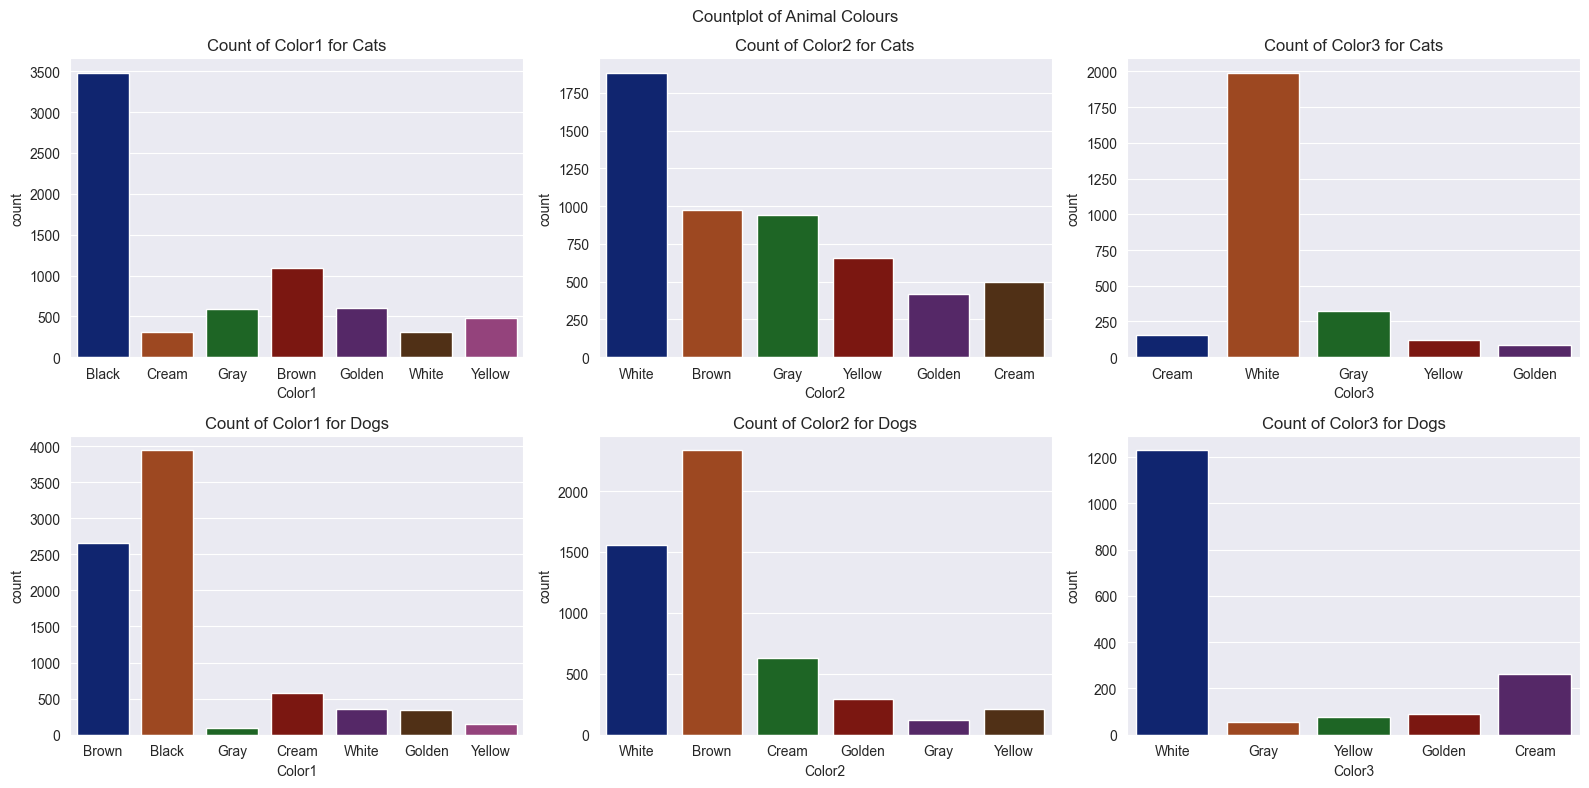

In [30]:
colour_cols = ['Color1', 'Color2', 'Color3']

fig, ax = plt.subplots(nrows=2, ncols=len(colour_cols), figsize=(16,8))

for i, (current, title) in enumerate(zip(pets, pets_title)):
    for j, col in enumerate(colour_cols):
        sns.countplot(data=current, x=col, ax=ax[i][j])
        ax[i][j].set_title('Count of ' + col + ' for ' + title)

plt.suptitle('Countplot of Animal Colours')
plt.tight_layout()
plt.show()

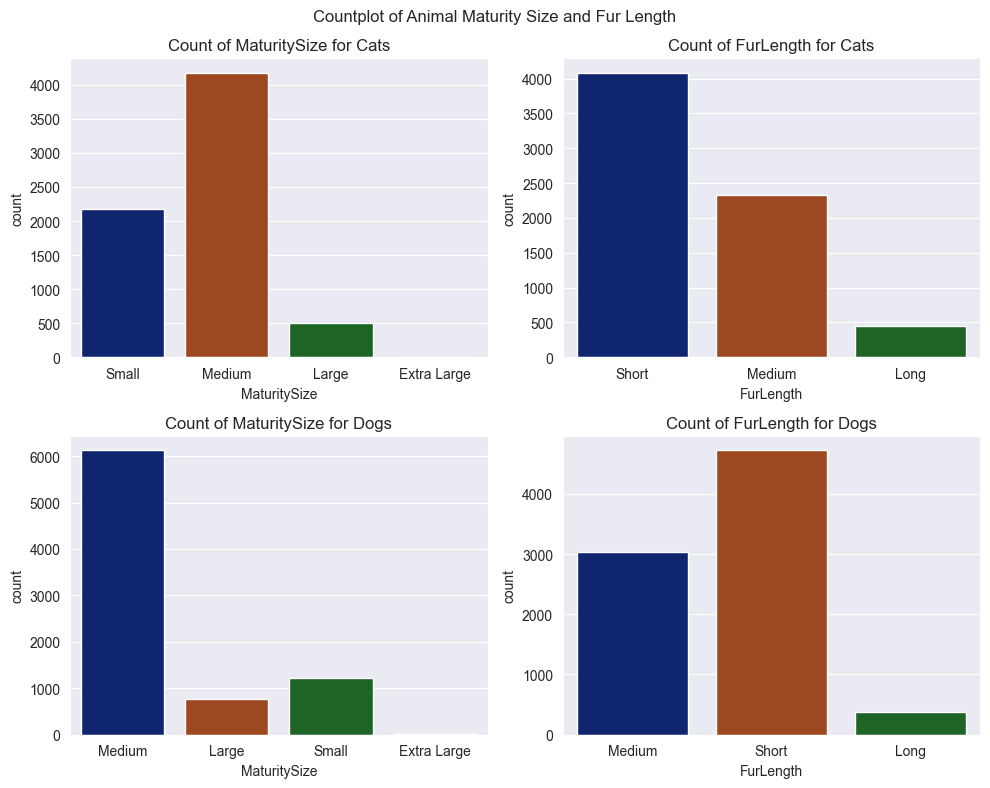

In [31]:
looks_col = ['MaturitySize', 'FurLength']

fig, ax = plt.subplots(nrows=2, ncols=len(looks_col), figsize=(10,8))

for i, (current, title) in enumerate(zip(pets, pets_title)):
    for j, col in enumerate(looks_col):
        sns.countplot(data=current, x=col, ax=ax[i][j])
        ax[i][j].set_title('Count of ' + col + ' for ' + title)

plt.suptitle('Countplot of Animal Maturity Size and Fur Length')
plt.tight_layout()
plt.show()

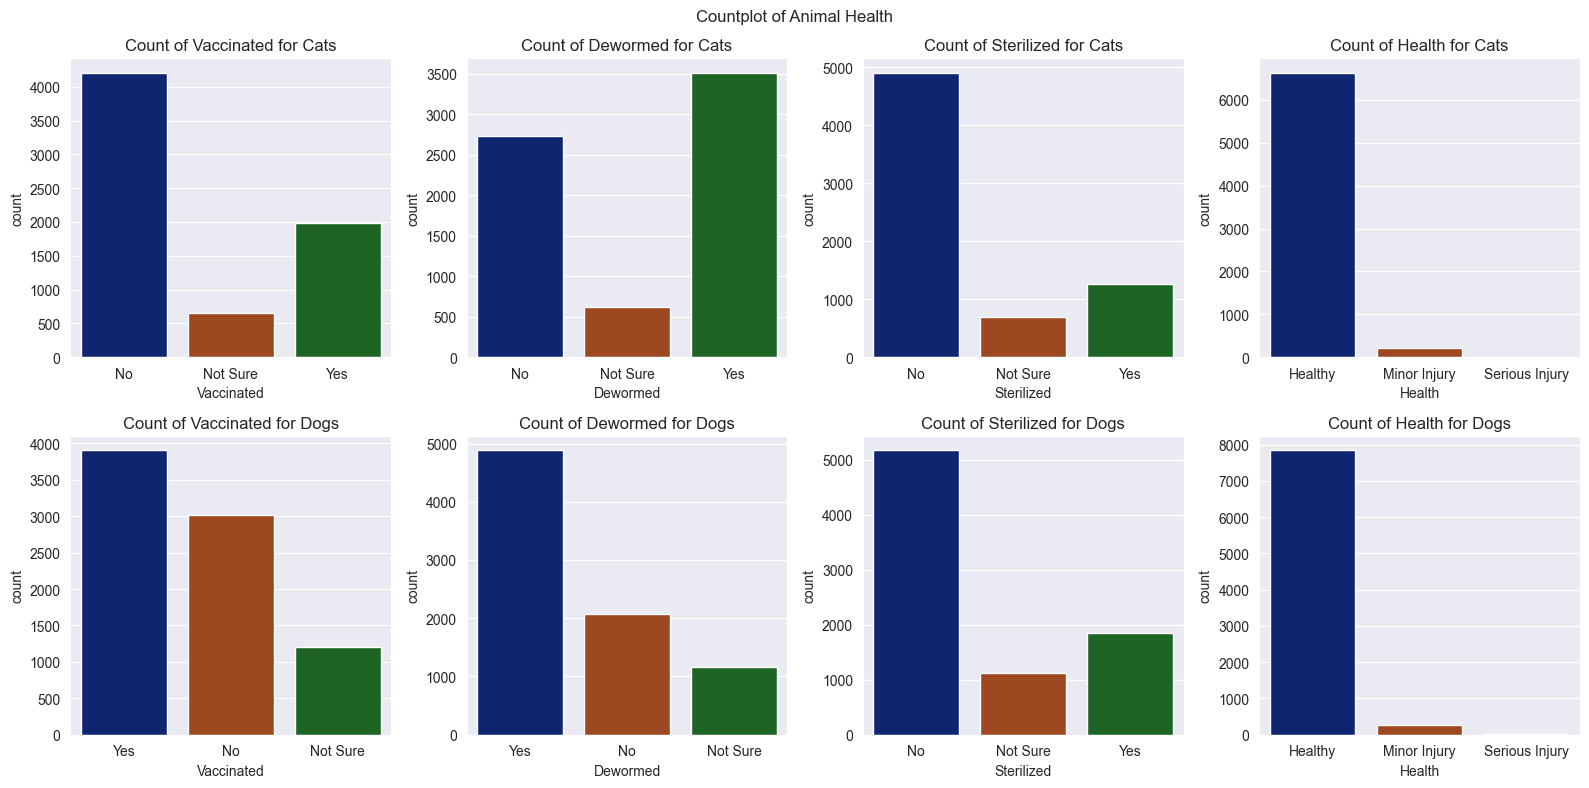

In [32]:
health_col = ['Vaccinated', 'Dewormed', 'Sterilized', 'Health']

fig, ax = plt.subplots(nrows=2, ncols=len(health_col), figsize=(16,8))

for i, (current, title) in enumerate(zip(pets, pets_title)):
    for j, col in enumerate(health_col):
        sns.countplot(data=current, x=col, ax=ax[i][j])
        ax[i][j].set_title('Count of ' + col + ' for ' + title)

plt.suptitle('Countplot of Animal Health')
plt.tight_layout()
plt.show()

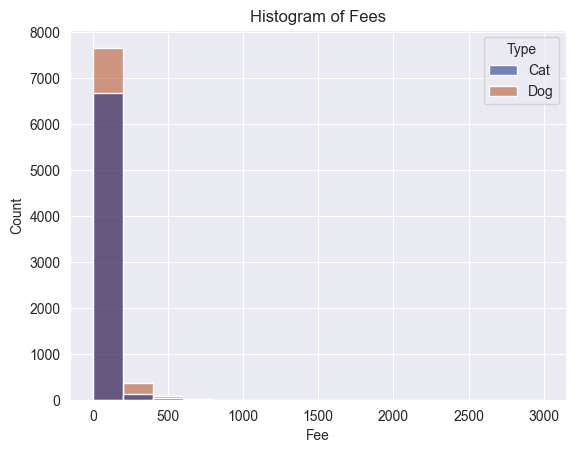

In [33]:
sns.histplot(data=df, x='Fee', hue='Type')
plt.title('Histogram of Fees')
plt.show()

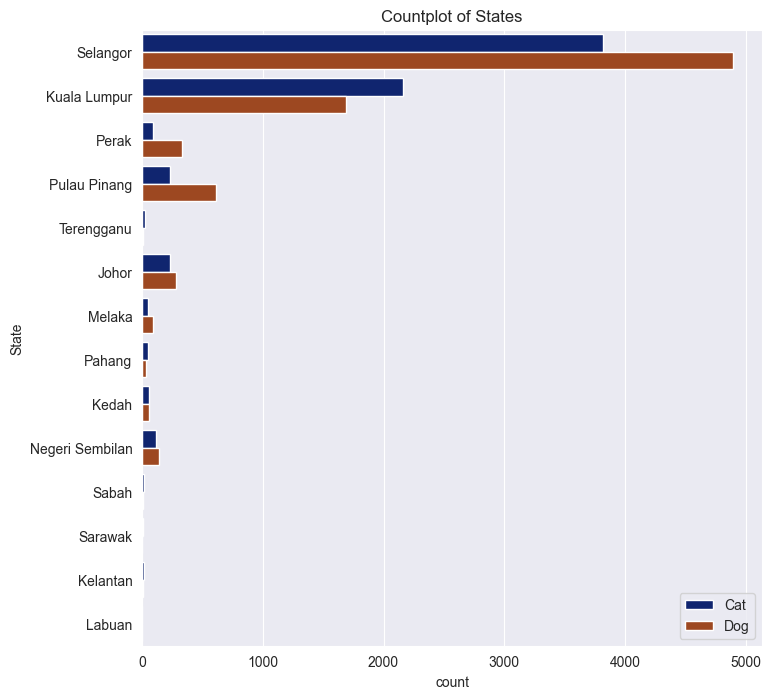

In [34]:
plt.figure(figsize=(8,8))
sns.countplot(data=df, y='State', hue='Type')
plt.title('Countplot of States')
plt.legend(loc='lower right')
plt.show()

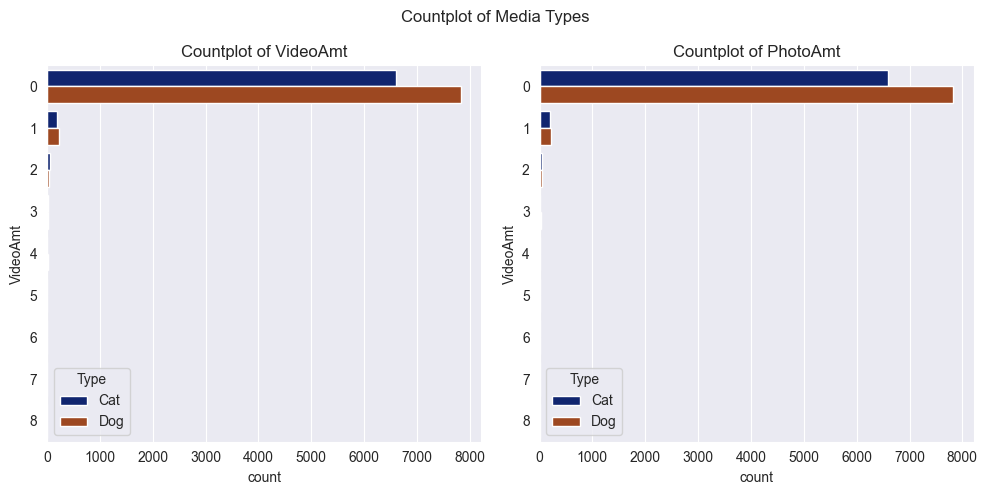

In [35]:
media_cols = ['VideoAmt', 'PhotoAmt']

fig, ax = plt.subplots(nrows=1, ncols=len(media_cols), figsize=(10,5))

for i, col in enumerate(media_cols):
    sns.countplot(data=df, y='VideoAmt', hue='Type', ax=ax[i])
    ax[i].set_title('Countplot of ' + col)

plt.suptitle('Countplot of Media Types')
plt.tight_layout()
plt.show()

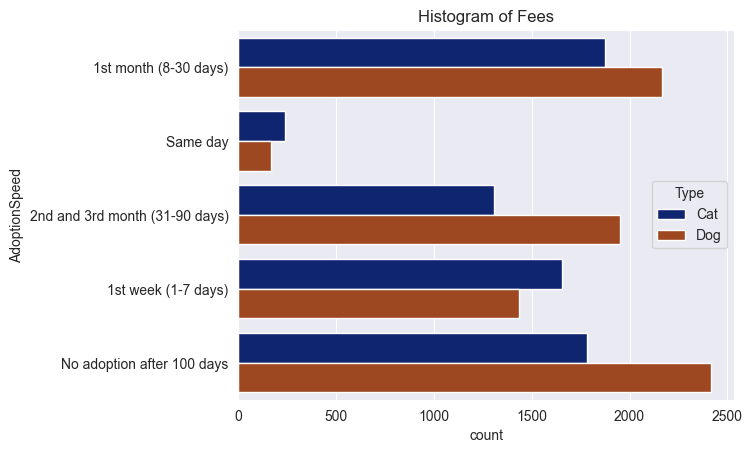

In [36]:
sns.countplot(data=df, y='AdoptionSpeed', hue='Type')
plt.title('Histogram of Fees')
plt.show()

# Feature selection
Using chi-square analysis, we reduce the dataset by finding features that are most likely to be correlated with our target of cats or dogs

In [37]:
df.columns

Index(['Type', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'VideoAmt',
       'PhotoAmt', 'AdoptionSpeed'],
      dtype='object')

In [38]:
target = 'Type'

X = df.drop(columns=target)
y = df[target]

display(X.shape)
display(y.shape)

(14993, 19)

(14993,)

In [39]:
from scipy.stats import chi2_contingency

In [40]:
# Empty lists to store results
columns = []
chi2_stats = []
p_values = []

# chi square for all cols
for col in X.columns:
    # Convert the column in X to a 1-dimensional array
    col_data = X[col].values.flatten()
            
    # Convert the target column to a 1-dimensional array
    target_data = y.values.flatten()

    # Create contingency table
    ct_table_ind = pd.crosstab(col_data, target_data)
            
    # Compute the chi2 stat and get the value
    c_stat, p, dof, expected = chi2_contingency(ct_table_ind)
            
    # Append results to lists
    columns.append(col)
    chi2_stats.append(c_stat)
    p_values.append(p)

# Create a DataFrame from the results
results_df = pd.DataFrame({'Column': columns, 'Chi2 Statistic': chi2_stats, 'P-Value': p_values})

In [41]:
# <= 0.05 = has association, is dependent, rejects null hypothesis

chi = results_df[results_df['P-Value'] <= 0.05].sort_values(by='P-Value', ascending=False).reset_index(drop=True)

chi['P-Value Decimal'] = chi['P-Value'].apply(lambda x: format(x, '.10f'))

print('Relevant features')
display(chi.shape)
display(chi)

Relevant features


(17, 4)

,Column,Chi2 Statistic,P-Value,P-Value Decimal
0,FurLength,34.072358,3.992835e-08,0.0000000399
1,PhotoAmt,158.975391,1.680726e-19,0.0000000000
2,Sterilized,107.185748,5.307751e-24,0.0000000000
3,AdoptionSpeed,162.168208,5.010488e-34,0.0000000000
4,Fee,385.631685,4.792821e-44,0.0000000000
5,Color3,210.016051,2.635924e-44,0.0000000000
6,Gender,226.168742,7.728258e-50,0.0000000000
7,Quantity,338.754392,4.859801e-61,0.0000000000
8,Dewormed,377.914121,8.649505e-83,0.0000000000
9,Age,686.458930,3.488857e-86,0.0000000000


In [42]:
display(results_df[(results_df['P-Value'] > 0.05)].sort_values(by='P-Value', ascending=False).reset_index(drop=True))

,Column,Chi2 Statistic,P-Value
0,Health,1.011179,0.603150
1,VideoAmt,10.978102,0.202943


In [43]:
cols = chi['Column'].unique().tolist()

X = X[cols]
X.head()

,FurLength,PhotoAmt,Sterilized,AdoptionSpeed,Fee,Color3,Gender,Quantity,Dewormed,Age,State,MaturitySize,Vaccinated,Color1,Color2,Breed1,Breed2
0,Short,1,No,1st month (8-30 days),100,NaN,Male,1,No,3,Selangor,Small,No,Black,White,Tabby,NaN
1,Medium,2,Not Sure,Same day,0,NaN,Male,1,Not Sure,1,Kuala Lumpur,Medium,Not Sure,Black,Brown,Domestic Medium Hair,NaN
2,Medium,7,No,2nd and 3rd month (31-90 days),0,NaN,Male,1,Yes,1,Selangor,Medium,Yes,Brown,White,Mixed Breed,NaN
3,Short,8,No,1st month (8-30 days),150,NaN,Female,1,Yes,4,Kuala Lumpur,Medium,Yes,Black,Brown,Mixed Breed,NaN
4,Short,3,No,1st month (8-30 days),0,NaN,Male,1,No,1,Selangor,Medium,No,Black,NaN,Mixed Breed,NaN


# Imputation using Simple Imputer

In [44]:
from sklearn.impute import SimpleImputer

In [45]:
cat = X.select_dtypes(include='object').columns.values.tolist()
num = X.select_dtypes(exclude='object').columns.values.tolist()

print(cat)
print(num)

['FurLength', 'Sterilized', 'AdoptionSpeed', 'Color3', 'Gender', 'Dewormed', 'State', 'MaturitySize', 'Vaccinated', 'Color1', 'Color2', 'Breed1', 'Breed2']
['PhotoAmt', 'Fee', 'Quantity', 'Age']


In [46]:
imputer_num = SimpleImputer(strategy='mean')
X_imputed_num = imputer_num.fit_transform(X[num])
X_imputed_num = X_imputed_num.astype('int64')

imputer_cat = SimpleImputer(strategy='most_frequent')
X_imputed_cat = imputer_cat.fit_transform(X[cat])

X_imputed_num_df = pd.DataFrame(X_imputed_num, columns=num)
X_imputed_cat_df = pd.DataFrame(X_imputed_cat, columns=cat)

In [47]:
X_imputed = X.copy()
X_imputed[cat] = X_imputed_cat_df
X_imputed[num] = X_imputed_num_df

display(X_imputed.head())

for col in X_imputed.columns:
    print(col, X_imputed[col].isna().sum())

display(X_imputed.dtypes)

,FurLength,PhotoAmt,Sterilized,AdoptionSpeed,Fee,Color3,Gender,Quantity,Dewormed,Age,State,MaturitySize,Vaccinated,Color1,Color2,Breed1,Breed2
0,Short,1,No,1st month (8-30 days),100,White,Male,1,No,3,Selangor,Small,No,Black,White,Tabby,Mixed Breed
1,Medium,2,Not Sure,Same day,0,White,Male,1,Not Sure,1,Kuala Lumpur,Medium,Not Sure,Black,Brown,Domestic Medium Hair,Mixed Breed
2,Medium,7,No,2nd and 3rd month (31-90 days),0,White,Male,1,Yes,1,Selangor,Medium,Yes,Brown,White,Mixed Breed,Mixed Breed
3,Short,8,No,1st month (8-30 days),150,White,Female,1,Yes,4,Kuala Lumpur,Medium,Yes,Black,Brown,Mixed Breed,Mixed Breed
4,Short,3,No,1st month (8-30 days),0,White,Male,1,No,1,Selangor,Medium,No,Black,White,Mixed Breed,Mixed Breed


FurLength 0
PhotoAmt 0
Sterilized 0
AdoptionSpeed 0
Fee 0
Color3 0
Gender 0
Quantity 0
Dewormed 0
Age 0
State 0
MaturitySize 0
Vaccinated 0
Color1 0
Color2 0
Breed1 0
Breed2 0


FurLength        object
PhotoAmt          int64
Sterilized       object
AdoptionSpeed    object
Fee               int64
Color3           object
Gender           object
Quantity          int64
Dewormed         object
Age               int64
State            object
MaturitySize     object
Vaccinated       object
Color1           object
Color2           object
Breed1           object
Breed2           object
dtype: object

# Class distribution

Type
Dog    8132
Cat    6861
Name: count, dtype: int64

<Axes: xlabel='Type', ylabel='count'>

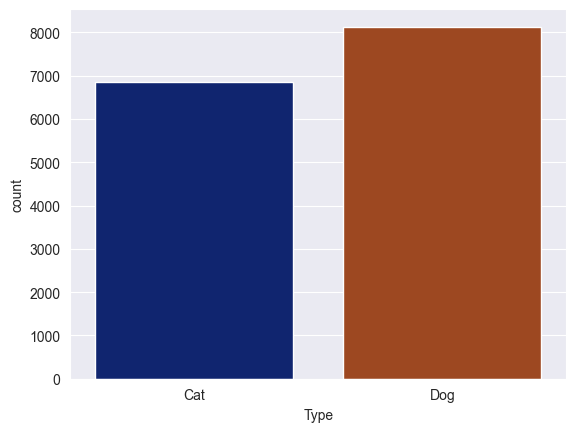

In [48]:
display(df[target].value_counts())
sns.countplot(df, x = target)

In [49]:
X_imputed.dtypes

FurLength        object
PhotoAmt          int64
Sterilized       object
AdoptionSpeed    object
Fee               int64
Color3           object
Gender           object
Quantity          int64
Dewormed         object
Age               int64
State            object
MaturitySize     object
Vaccinated       object
Color1           object
Color2           object
Breed1           object
Breed2           object
dtype: object

## Balancing using SMOTENC
Handles both numerical and categorical data types

In [50]:
from imblearn.over_sampling import SMOTENC

In [51]:
cat = X_imputed.select_dtypes(include='object').columns.values.tolist()
cat

['FurLength',
 'Sterilized',
 'AdoptionSpeed',
 'Color3',
 'Gender',
 'Dewormed',
 'State',
 'MaturitySize',
 'Vaccinated',
 'Color1',
 'Color2',
 'Breed1',
 'Breed2']

In [52]:
smote_nc = SMOTENC(categorical_features= cat, random_state=5)

X_res, y_res = smote_nc.fit_resample(X_imputed, y)

display(X_res.shape)
display(y_res.shape)

(16264, 17)

(16264,)

Type
Cat    8132
Dog    8132
Name: count, dtype: int64

<Axes: xlabel='Type', ylabel='count'>

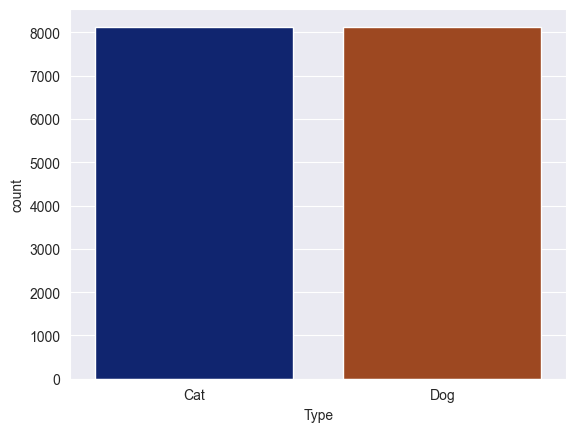

In [53]:
df_res = pd.concat([X_res, y_res], axis=1)
df_res

display(df_res[target].value_counts())
sns.countplot(df_res, x = target)

In [54]:
for col in df_res.columns:
    print(col, df_res[col].isna().sum())

FurLength 0
PhotoAmt 0
Sterilized 0
AdoptionSpeed 0
Fee 0
Color3 0
Gender 0
Quantity 0
Dewormed 0
Age 0
State 0
MaturitySize 0
Vaccinated 0
Color1 0
Color2 0
Breed1 0
Breed2 0
Type 0


# Pre-processing
Normalising the dataset and encoding with label encoder

## Standard scalar

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
num = X_res.select_dtypes(exclude='object').columns.values.tolist()
num

['PhotoAmt', 'Fee', 'Quantity', 'Age']

In [57]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X_res[num])

X_scaled = pd.DataFrame(X_scaled, columns = num)
X_scaled.head()

,PhotoAmt,Fee,Quantity,Age
0,-0.824863,1.009370,-0.388966,-0.404663
1,-0.537752,-0.272706,-0.388966,-0.516665
2,0.897806,-0.272706,-0.388966,-0.516665
3,1.184918,1.650408,-0.388966,-0.348662
4,-0.250640,-0.272706,-0.388966,-0.516665


## Encoding categorical data with Label Encoder

In [58]:
from sklearn.preprocessing import LabelEncoder

In [59]:
cat = X_res.select_dtypes(include='object').columns.values.tolist()
cat

['FurLength',
 'Sterilized',
 'AdoptionSpeed',
 'Color3',
 'Gender',
 'Dewormed',
 'State',
 'MaturitySize',
 'Vaccinated',
 'Color1',
 'Color2',
 'Breed1',
 'Breed2']

In [60]:
X_le = X_res[cat].copy()

le = LabelEncoder()

for col in cat:
    X_le[col] = le.fit_transform(X_res[col])

X_le

,FurLength,Sterilized,AdoptionSpeed,Color3,Gender,Dewormed,State,MaturitySize,Vaccinated,Color1,Color2,Breed1,Breed2
0,2,0,0,3,1,0,12,3,0,0,4,156,78
1,1,1,4,3,1,1,3,2,1,0,0,57,78
2,1,0,2,3,1,2,12,2,2,1,4,104,78
3,2,0,0,3,0,2,3,2,2,0,0,104,78
4,2,0,0,3,1,0,12,2,0,0,4,104,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16259,2,0,0,3,0,2,12,2,2,0,4,58,78
16260,1,0,0,3,1,0,12,3,0,0,4,57,78
16261,1,0,2,3,2,2,12,2,0,0,3,58,49
16262,1,1,1,3,1,1,12,2,1,0,4,57,78


## End of pre-processing

In [61]:
df_encoded = df_res.copy()

df_encoded[cat] = X_le[cat]
df_encoded[num] = X_scaled[num]

df_encoded.head()

,FurLength,PhotoAmt,Sterilized,AdoptionSpeed,Fee,Color3,Gender,Quantity,Dewormed,Age,State,MaturitySize,Vaccinated,Color1,Color2,Breed1,Breed2,Type
0,2,-0.824863,0,0,1.009370,3,1,-0.388966,0,-0.404663,12,3,0,0,4,156,78,Cat
1,1,-0.537752,1,4,-0.272706,3,1,-0.388966,1,-0.516665,3,2,1,0,0,57,78,Cat
2,1,0.897806,0,2,-0.272706,3,1,-0.388966,2,-0.516665,12,2,2,1,4,104,78,Dog
3,2,1.184918,0,0,1.650408,3,0,-0.388966,2,-0.348662,3,2,2,0,0,104,78,Dog
4,2,-0.250640,0,0,-0.272706,3,1,-0.388966,0,-0.516665,12,2,0,0,4,104,78,Dog


In [62]:
target

'Type'

In [63]:
X_encoded = df_encoded.drop(columns=target)

print(X_encoded.shape)
print(y_res.shape)

(16264, 17)
(16264,)


In [64]:
for col in df_encoded.columns:
    print(col, df_encoded[col].isna().sum())

display(df_encoded.dtypes)

FurLength 0
PhotoAmt 0
Sterilized 0
AdoptionSpeed 0
Fee 0
Color3 0
Gender 0
Quantity 0
Dewormed 0
Age 0
State 0
MaturitySize 0
Vaccinated 0
Color1 0
Color2 0
Breed1 0
Breed2 0
Type 0


FurLength          int32
PhotoAmt         float64
Sterilized         int32
AdoptionSpeed      int32
Fee              float64
Color3             int32
Gender             int32
Quantity         float64
Dewormed           int32
Age              float64
State              int32
MaturitySize       int32
Vaccinated         int32
Color1             int32
Color2             int32
Breed1             int32
Breed2             int32
Type              object
dtype: object

# Machine Learning algorithms

## PCA Implementation

In [65]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D # to make 3d matplotlib plots

In [66]:
targets = df_encoded[target].unique().tolist()
targets

['Cat', 'Dog']

In [67]:
pca = PCA(n_components=2)

pca_components = pca.fit_transform(X_encoded)

pca_df = pd.DataFrame(pca_components, columns= ["principal component 1", "principal component 2"])

print(pca.explained_variance_ratio_)
print(pca.singular_values_)

pca_df.head()

[0.83389988 0.14024914]
[4179.50710263 1714.02919654]


,principal component 1,principal component 2
0,70.351695,0.105272
1,-28.627842,-2.733131
2,18.386200,-1.399982
3,18.355430,-1.379735
4,18.374231,-1.398148


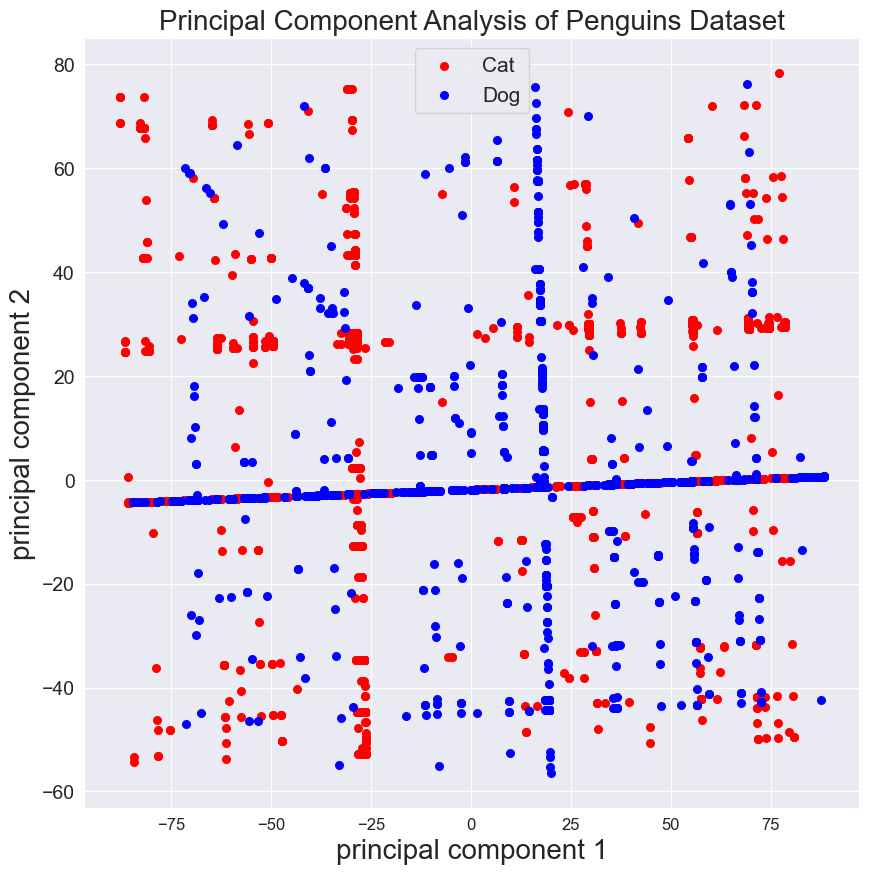

In [68]:
plt.figure(figsize=(10,10))

pca_df = pca_df.set_index(df_encoded.index)

colors = ['r', 'b']

for target, color in zip(targets, colors):
    indices_to_keep = df_encoded['Type'] == target
    plt.scatter(pca_df.loc[indices_to_keep, 'principal component 1'],
                pca_df.loc[indices_to_keep, 'principal component 2'],
                c=color, s=30)

plt.legend(targets, prop={'size': 15})

plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel("principal component 1", fontsize=20)
plt.ylabel("principal component 2", fontsize=20)
plt.title("Principal Component Analysis of Penguins Dataset", fontsize=20)

plt.show()

### 3D

In [69]:
pca = PCA(n_components=3)

pca_components = pca.fit_transform(X_encoded)

pca3_df = pd.DataFrame(pca_components, columns= ["principal component 1", "principal component 2", "principal component 3"])

print(pca.explained_variance_ratio_)
print(pca.singular_values_)

pca3_df.head()

[0.83389988 0.14024914 0.01402021]
[4179.50710263 1714.02919654  541.93279   ]


,principal component 1,principal component 2,principal component 3
0,70.351695,0.105272,-2.877753
1,-28.627842,-2.733131,5.545201
2,18.386200,-1.399982,-3.170833
3,18.355430,-1.379735,5.719771
4,18.374231,-1.398148,-3.188781


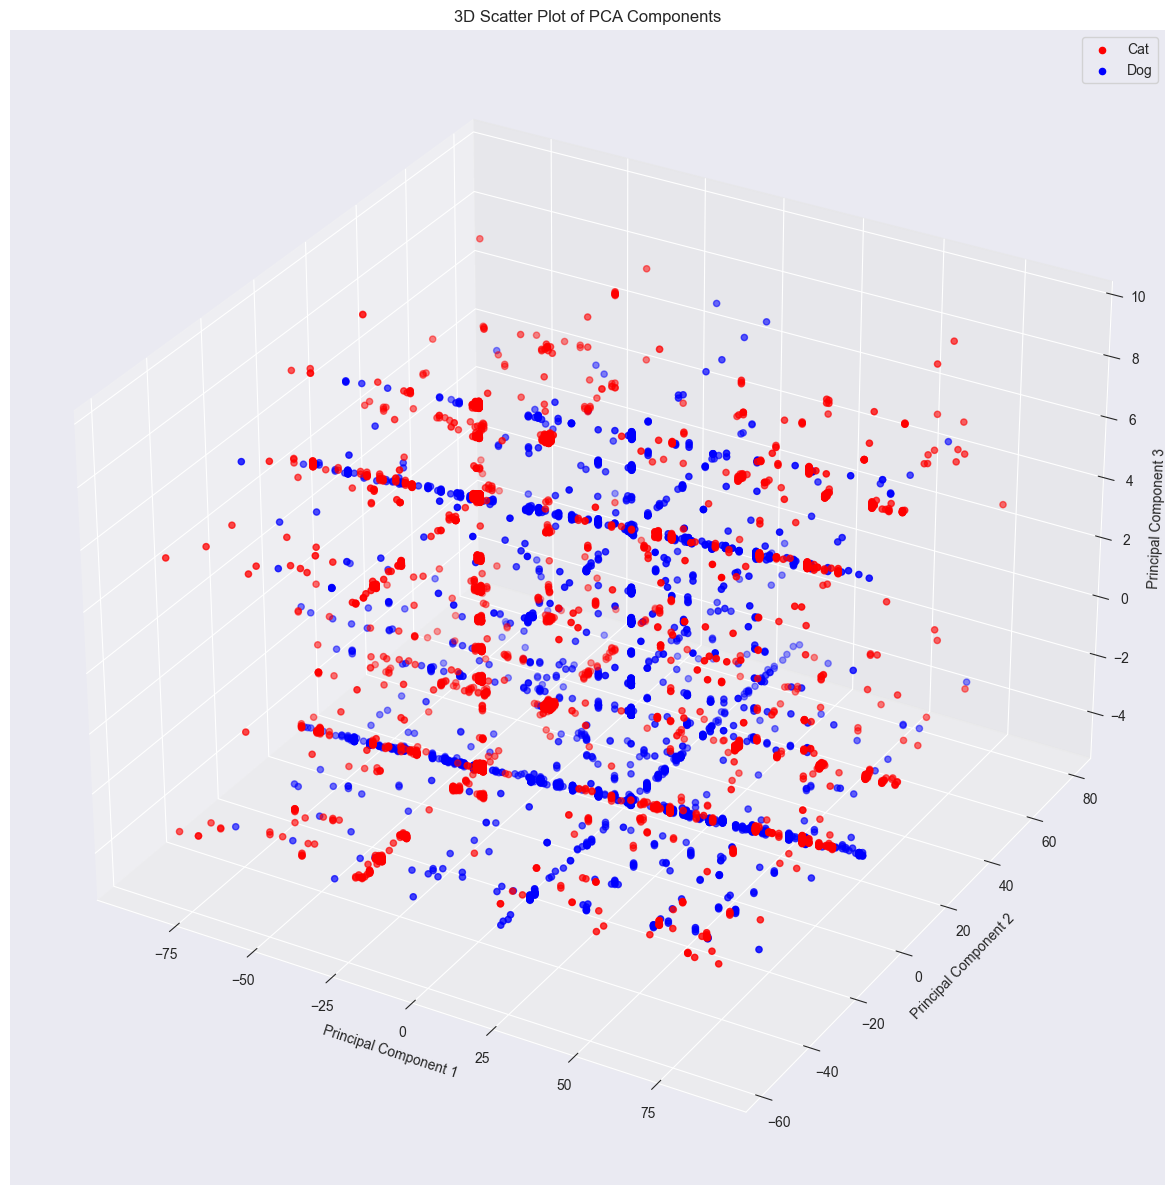

In [70]:
colors = ['r', 'b']

pca3_df = pca3_df.set_index(df_encoded.index)

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(1, 1, 1, projection='3d')

for target, color in zip(targets, colors):
    indices_to_keep = df_encoded['Type'] == target
    ax.scatter(pca3_df.loc[indices_to_keep, 'principal component 1'],
                pca3_df.loc[indices_to_keep, 'principal component 2'],
                pca3_df.loc[indices_to_keep, 'principal component 3'],
                c=color, label=target)

ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.set_title("3D Scatter Plot of PCA Components")

ax.legend()

plt.show()

PCA will not be used as it's not suitable for categorical data types.

PCA data points are calculated based on the deviation of the data points from a central tendency. That of which, categorical data does not have.

## Train-test-split

In [71]:
from sklearn.metrics import roc_curve, roc_auc_score

In [72]:
def print_ROC_scores(y_test, y_prob):
    macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo", average="macro")
    weighted_roc_auc_ovo = roc_auc_score(
        y_test, y_prob, multi_class="ovo", average="weighted"
    )
    macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr", average="macro")
    weighted_roc_auc_ovr = roc_auc_score(
        y_test, y_prob, multi_class="ovr", average="weighted"
    )
    print(
        "One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
        "(weighted by prevalence)".format(macro_roc_auc_ovo, weighted_roc_auc_ovo)
    )

    print()

    print(
        "One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
        "(weighted by prevalence)".format(macro_roc_auc_ovr, weighted_roc_auc_ovr)
    )

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
# Using a test size of 30% and training size of 70%
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_res, test_size=0.3, random_state=3)

print('Training set: ', X_train.shape)
print(y_train.shape)

print('Testing set: ', X_test.shape)
print(y_test.shape)

Training set:  (11384, 17)
(11384,)
Testing set:  (4880, 17)
(4880,)


## Linear Regression

## Logistic Regression

In [75]:
from sklearn.linear_model import LogisticRegression


logreg = LogisticRegression(solver='lbfgs', verbose= 1, max_iter=1000) #initialize logistic regression model
logreg.fit(X_train, y_train) 


print('Training accuracy: ', logreg.score(X_train, y_train))
print('Testing accuracy: ', logreg.score(X_test, y_test))


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Training accuracy:  0.8459241040056219
Testing accuracy:  0.8448770491803279


In [76]:
from sklearn.linear_model import LogisticRegression


logreg = LogisticRegression(solver='newton-cholesky', penalty='l2', C=2, max_iter=1000) #initialize logistic regression model with 'l2' penalty
logreg.fit(X_train, y_train) 

print('Training accuracy: ', logreg.score(X_train, y_train))
print('Testing accuracy: ', logreg.score(X_test, y_test))


Training accuracy:  0.8457484188334504
Testing accuracy:  0.844672131147541


In [77]:
from sklearn.linear_model import LogisticRegression


logreg = LogisticRegression(solver='liblinear', penalty='l2', C=2, max_iter=1000) # logistic regression model with 'l2' penalty
logreg.fit(X_train, y_train) 

print('Training accuracy: ', logreg.score(X_train, y_train))
print('Testing accuracy: ', logreg.score(X_test, y_test))


Training accuracy:  0.8459241040056219
Testing accuracy:  0.8450819672131148


In [78]:
from sklearn.model_selection import learning_curve

# Create the learning curve
train_sizes, train_scores, test_scores = learning_curve(logreg, X_train, y_train, cv=10)

In [79]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

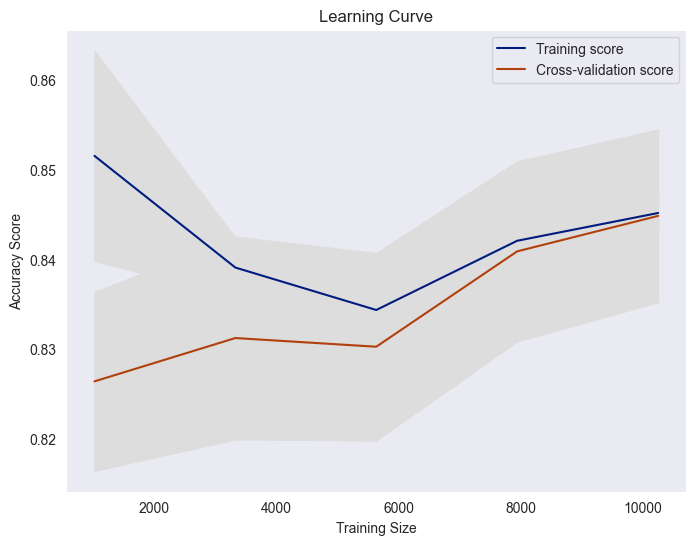

In [80]:
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='#DDDDDD')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='#DDDDDD')

plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.grid()
plt.show()


In [81]:
from sklearn.metrics import classification_report

y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         Cat       0.86      0.82      0.84      2418
         Dog       0.83      0.87      0.85      2462

    accuracy                           0.85      4880
   macro avg       0.85      0.84      0.84      4880
weighted avg       0.85      0.85      0.84      4880



In [82]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)
tn, fp, fn, tp = conf_mat.ravel()
print('True positive: ',tp)
print('True negatives: ',tn)
print('False positive: ',fp)
print('False negatives: ',fn)

[[1972  446]
 [ 310 2152]]
True positive:  2152
True negatives:  1972
False positive:  446
False negatives:  310


<Axes: >

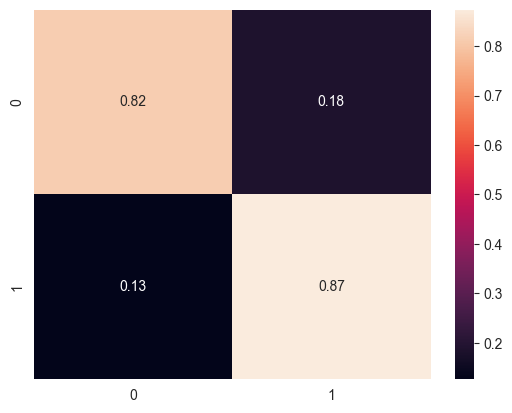

In [83]:
conf_mat = confusion_matrix(y_test, y_pred,normalize='true')
sns.heatmap(conf_mat, annot=True)

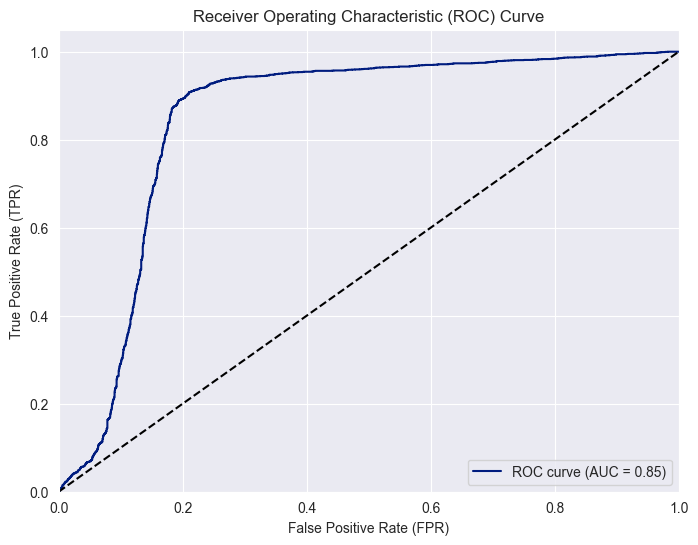

In [84]:
y_pred_proba = logreg.predict_proba(X_test)[::, 1]

fpr, tpr, _ = roc_curve(y_test,  y_pred_proba, pos_label='Dog')

auc = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


## K-Means

### Finding the Optimal Number of Clusters using Elbow Method

In [85]:
from sklearn.cluster import KMeans

c:\Users\Anis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Anis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Anis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Anis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

Inertia: 2615052.4557797043


c:\Users\Anis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Anis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Anis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Anis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

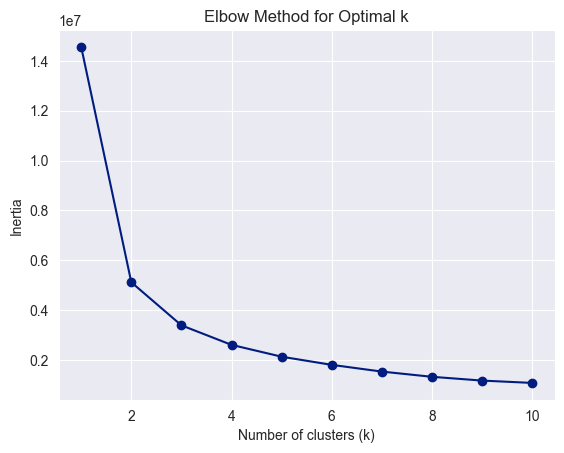

In [86]:
# 3. Create and fit the k-means clustering model
kmeans = KMeans(n_clusters=4, random_state=0) 
kmeans.fit(X_train)

# Optionally, you can use the trained model to predict cluster labels for the testing data
cluster_labels = kmeans.predict(X_test)

# 4. Evaluate the performance of the clustering model
# Since k-means is unsupervised, so it won't have traditional evaluation metrics like accuracy
# Evaluate based on inertia or silhouette score.
# Inertia measures how tightly grouped the clusters are. Lower inertia is generally better.
print("Inertia:", kmeans.inertia_)

# List to store inertia values
inertia = []

# Define range of k values to test
k_values = range(1, 11)

# Fit KMeans for each value of k and store inertia
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_train)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


### Visualizing KMeans Clustering Results on Training and Testing Data (k=2)

c:\Users\Anis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


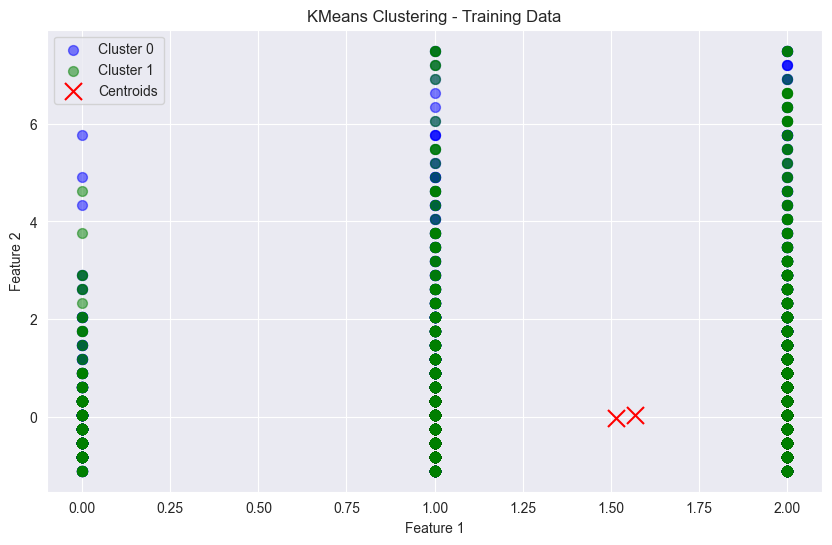

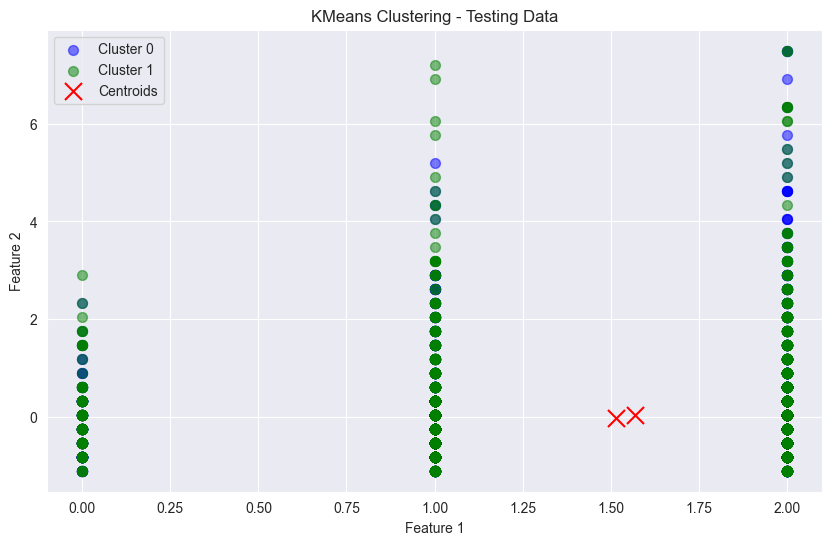

In [87]:
# Initialize KMeans with optimal value of k
kmeans = KMeans(n_clusters=2, random_state=0)

# Fit KMeans to the training data
kmeans.fit(X_train)

# Get cluster labels for the training and testing data
train_labels = kmeans.predict(X_train)
test_labels = kmeans.predict(X_test)

# Define colors for each cluster
colors = ['blue', 'green']

# Scatter plot for training data
plt.figure(figsize=(10, 6))
for i in range(2):
    plt.scatter(X_train.values[train_labels == i, 0], X_train.values[train_labels == i, 1], c=colors[i], s=50, alpha=0.5, label=f'Cluster {i}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=150, label='Centroids')
plt.title('KMeans Clustering - Training Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Scatter plot for testing data
plt.figure(figsize=(10, 6))
for i in range(2):
    plt.scatter(X_test.values[test_labels == i, 0], X_test.values[test_labels == i, 1], c=colors[i], s=50, alpha=0.5, label=f'Cluster {i}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=150, label='Centroids')
plt.title('KMeans Clustering - Testing Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


### Finding the Optimal Number of Clusters using Silhouette Score

In [88]:
from sklearn.metrics import silhouette_score

c:\Users\Anis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Anis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Anis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Anis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

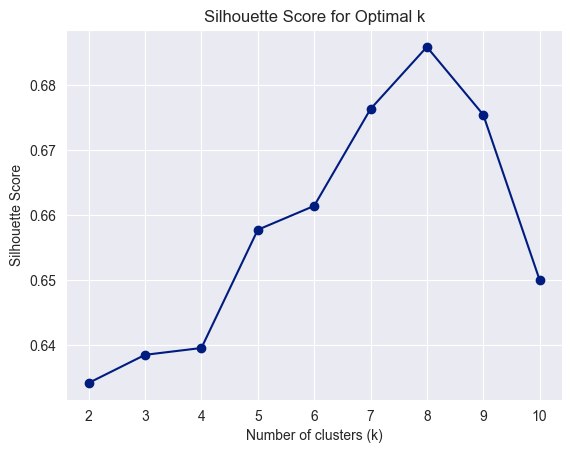

Optimal number of clusters (k): 8


In [89]:
# 1. Compute silhouette scores for different values of k
silhouette_scores = []
k_values = range(2, 11)  # Adjust the range as needed

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(X_train)
    silhouette_scores.append(silhouette_score(X_train, cluster_labels))

# 2. Plot silhouette scores
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# 3. Find the optimal k
optimal_k = k_values[np.argmax(silhouette_scores)]
print("Optimal number of clusters (k):", optimal_k)


### Visualizing KMeans Clustering Results on Training and Testing Data (k=8)

c:\Users\Anis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


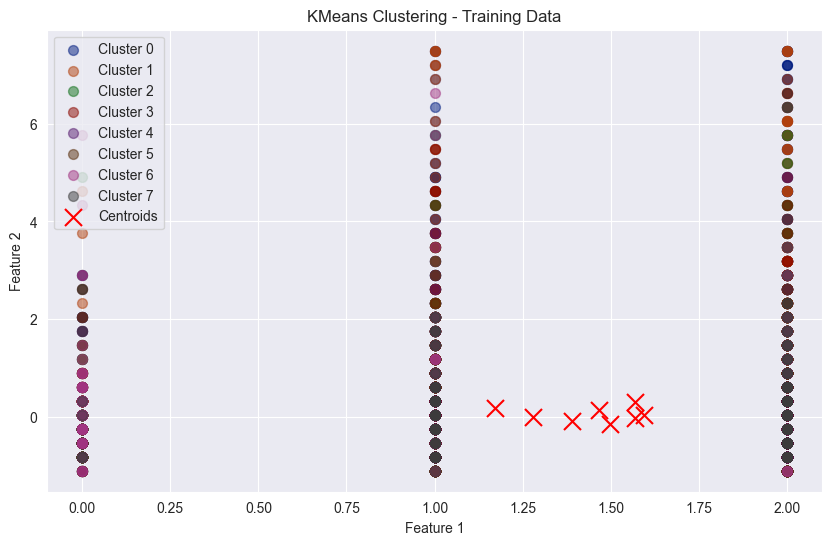

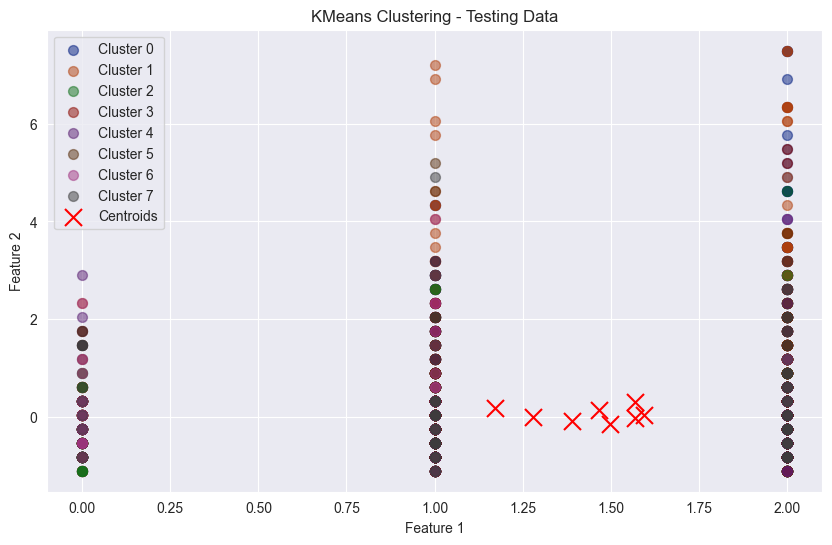

In [90]:
# Initialize KMeans with optimal value of k
kmeans = KMeans(n_clusters=8, random_state=0)

# Fit KMeans to the training data
kmeans.fit(X_train)

# Get cluster labels for the training and testing data
train_labels = kmeans.predict(X_train)
test_labels = kmeans.predict(X_test)

# Scatter plot for training data
plt.figure(figsize=(10, 6))
for label in range(8):  # Loop through each cluster label
    plt.scatter(X_train.values[train_labels == label, 0], X_train.values[train_labels == label, 1], label=f'Cluster {label}', s=50, alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=150, label='Centroids')
plt.title('KMeans Clustering - Training Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Scatter plot for testing data
plt.figure(figsize=(10, 6))
for label in range(8):  # Loop through each cluster label
    plt.scatter(X_test.values[test_labels == label, 0], X_test.values[test_labels == label, 1], label=f'Cluster {label}', s=50, alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=150, label='Centroids')
plt.title('KMeans Clustering - Testing Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


The analysis utilized both the elbow method and silhouette score to determine the optimal number of clusters. However, there was a difference in their recommendations: the elbow method suggested two clusters, while the silhouette score pointed towards eight clusters. Despite this difference, both sets of clusters were implemented using KMeans.

Upon visualizing the data, it was observed that although distinct groupings were expected, the large dataset size might have caused some blending or overlap of colors within the same group. This observation applied to both the two-cluster and eight-cluster scenarios.

In summary, while aiming for clear cluster separation, the visualization may not accurately reflect this due to factors such as dataset size and color representation.

# END